In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


In [94]:
data = pd.read_csv("housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


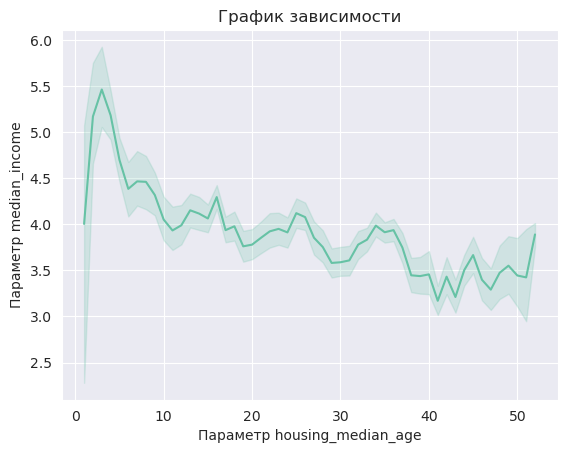

In [95]:
sns.set_style('darkgrid')
sns.set_palette('Set2')
sns.lineplot(
    x=data["housing_median_age"],
    y=data["median_income"],
)
plt.title('График зависимости')
plt.xlabel('Параметр housing_median_age')
plt.ylabel('Параметр median_income')
plt.show()

In [97]:
x = np.array(data["housing_median_age"]).reshape(-1, 1)
y = np.array(data["median_income"]).reshape(-1, 1)

In [98]:
DEGREES = 4
regression = make_pipeline(PolynomialFeatures(DEGREES), LinearRegression())
regression.fit(x, y)
predictions = regression.predict(x)
mean_squared_error = np.mean((predictions - np.array(y)) ** 2)
print(f'Среднеквадратическая ошибка = {mean_squared_error}')

Среднеквадратическая ошибка = 3.529311017710533


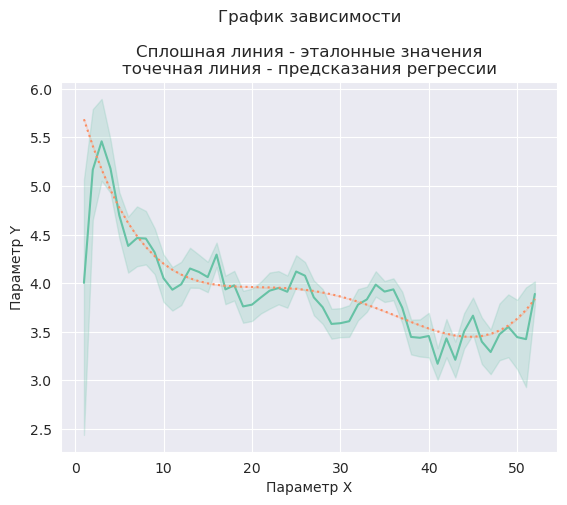

In [99]:
sns.lineplot(
    x=data["housing_median_age"],
    y=data["median_income"],
    linestyle="solid"
)
sns.lineplot(
    x=data["housing_median_age"],
    y=predictions.reshape(-1),
    linestyle="dotted"
)
plt.title(
    'График зависимости\n\n'
    'Сплошная линия - эталонные значения\n'
    'точечная линия - предсказания регрессии'
)
plt.xlabel('Параметр X')
plt.ylabel('Параметр Y')
plt.show()

In [100]:
x_parameters = np.append(
    regression['linearregression'].intercept_[0],
    regression['linearregression'].coef_[0][1:]
)
x_parameters

array([ 5.99896442e+00, -3.30781285e-01,  1.96182069e-02, -4.95336225e-04,
        4.32733286e-06])